# Stock Analysis and Web Scraping of Various Stocks using Python

By Janet Antunez

Completed September 2021

In [1]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23907 sha256=dc656095b9e66728834214e5f9138a789f8f91f2e13d3b8b263efd3ef92ce882
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/ec/cc/c1/32da8ee853d742d5d7cbd11ee04421222eb354672020b57297
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8367 sha256=cbfbb3cc8792e880a2f73c1aebecaf544f6918f4890dc5a3814386d38149aa4e
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/57/6d/a3/a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking


In [2]:
import yfinance as yf
import pandas as pd

In [3]:
apple = yf.Ticker("AAPL")

In [4]:
apple_info = apple.info

In [5]:
apple_info['country']

'United States'

In [6]:
apple_share_price_data = apple.history(period="max")

In [7]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100600,0.101037,0.100600,0.100600,469033600,0.0,0.0
1980-12-15,0.095789,0.095789,0.095352,0.095352,175884800,0.0,0.0
1980-12-16,0.088790,0.088790,0.088353,0.088353,105728000,0.0,0.0
1980-12-17,0.090540,0.090977,0.090540,0.090540,86441600,0.0,0.0
1980-12-18,0.093165,0.093602,0.093165,0.093165,73449600,0.0,0.0


In [9]:
apple_share_price_data.reset_index(inplace=True)

<AxesSubplot:xlabel='Date'>

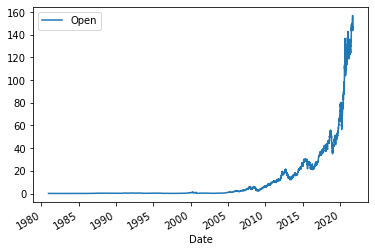

In [10]:
apple_share_price_data.plot(x="Date",y="Open")

In [12]:
apple.dividends

Date
1987-05-11    0.000536
1987-08-10    0.000536
1987-11-17    0.000714
1988-02-12    0.000714
1988-05-16    0.000714
                ...   
2020-08-07    0.205000
2020-11-06    0.205000
2021-02-05    0.205000
2021-05-07    0.220000
2021-08-06    0.220000
Name: Dividends, Length: 72, dtype: float64

<AxesSubplot:title={'center':'Apple Dividends'}, xlabel='Date'>

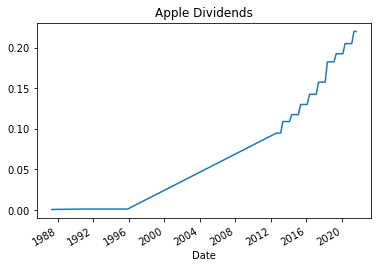

In [30]:
apple.dividends.plot(title="Apple Dividends")

In [14]:
amd = yf.Ticker("AMD")

In [16]:
amd_info = amd.info

In [18]:
amd_info['country']

'United States'

In [19]:
amd_info['sector']

'Technology'

In [20]:
amd_share_price_data = amd.history(period="max")

In [21]:
amd_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17,0.0,3.302083,3.125000,3.145833,219600,0,0.0
1980-03-18,0.0,3.125000,2.937500,3.031250,727200,0,0.0
1980-03-19,0.0,3.083333,3.020833,3.041667,295200,0,0.0
1980-03-20,0.0,3.062500,3.010417,3.010417,159600,0,0.0
1980-03-21,0.0,3.020833,2.906250,2.916667,130800,0,0.0


In [22]:
amd_share_price_data.reset_index(inplace=True)

<AxesSubplot:title={'center':'AMD Volume of Shares'}, xlabel='Date'>

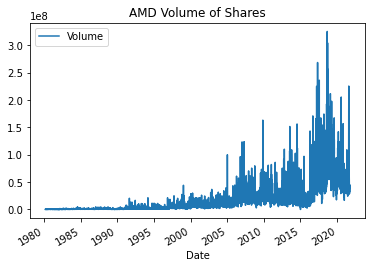

In [25]:
amd_share_price_data.plot(x="Date",y="Volume",title="AMD Volume of Shares")

In [26]:
amd.dividends

Series([], Name: Dividends, dtype: int64)

<AxesSubplot:xlabel='Date'>

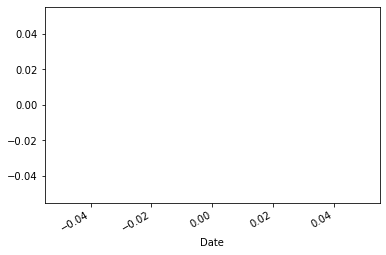

In [27]:
amd.dividends.plot()

In [31]:
# Webscraping
#!pip install pandas
#!pip install requests
!pip install bs4
#!pip install plotly

  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=90a46b84d450dc5fd9fc53e98f77d547cb8fc892c5cfd1743a0a07f51fd30ca9
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/75/78/21/68b124549c9bdc94f822c02fb9aa3578a669843f9767776bca
Successfully built bs4


In [32]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [33]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"
data = requests.get(url).text

In [34]:
#parse text into html using BeautifulSoup
soup = BeautifulSoup(data, 'html5lib')

In [37]:
netflix_data = pd.DataFrame(columns=["Date","Open","High","Low","Close","Adj Close","Volume"])

#First we isolate the body of the table which contains the information
#Second we loop through each row and find all the common values

for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
#Finally, append the data from each row to the table
netflix_data = netflix_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index = True)

In [38]:
netflix_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Sep 01, 2015",109.35,111.24,93.55,103.26,103.26,"497,401,200"


In [39]:
read_html_pandas_data = pd.read_html(url)

In [41]:
#alternate method instead of the one right above
read_html_pandas_data = pd.read_html(str(soup))

In [43]:
netflix_dataframe = read_html_pandas_data[0]

In [44]:
netflix_dataframe.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,78560600
1,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,66927600
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,111573300
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,90183900
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,61902300


In [45]:
#New exercise with Amazon Data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html"
html_data = requests.get(url).text

In [46]:
soup = BeautifulSoup(html_data,'html5lib')

In [48]:
amazon_data = pd.DataFrame(columns=["Date","Open","High","Low","Close","Adj Close","Volumne"])
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all('td')
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
amazon_data = amazon_data.append({"Date":date,"Open":Open,"High":high,"Low":low,"Close":close,"Adj Close":adj_close,"Volume":volume}, ignore_index = True)

In [49]:
amazon_data.head()

,Date,Open,High,Low,Close,Adj Close,Volumne,Volume
0,"Jan 01, 2016",656.29,657.72,547.18,587.00,587.00,NaN,"130,200,900"


In [56]:
read_html_amazon_data = pd.read_html(str(soup))

In [57]:
amazon_dataframe = read_html_amazon_data[0]

In [58]:
amazon_dataframe.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jan 01, 2021",3270.00,3363.89,3086.00,3206.20,3206.20,71528900
1,"Dec 01, 2020",3188.50,3350.65,3072.82,3256.93,3256.93,77556200
2,"Nov 01, 2020",3061.74,3366.80,2950.12,3168.04,3168.04,90810500
3,"Oct 01, 2020",3208.00,3496.24,3019.00,3036.15,3036.15,116226100
4,"Sep 01, 2020",3489.58,3552.25,2871.00,3148.73,3148.73,115899300


In [81]:
amazon_dataframe.tail()

,Date,Open,High,Low,Close*,Adj Close**,Volume
57,"Apr 01, 2016",590.49,669.98,585.25,659.59,659.59,78464200
58,"Mar 01, 2016",556.29,603.24,538.58,593.64,593.64,94009500
59,"Feb 01, 2016",578.15,581.80,474.00,552.52,552.52,124144800
60,"Jan 01, 2016",656.29,657.72,547.18,587.00,587.00,130200900
61,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...


In [82]:
for title in soup.find_all('title'):
    print(title.get_text())

Amazon.com, Inc. (AMZN) Stock Historical Prices & Data - Yahoo Finance
